In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Getting the current working directory
current_working_directory = os.getcwd()

# Printing the current working directory
print("Current Working Directory:", current_working_directory)

Current Working Directory: /content


In [ ]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = '/content/webrtc_static.csv'

df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the DataFrame
print(df.head())

   Frame Count Start Time End Time
0            0        NaN      NaN
1            1        NaN      NaN
2            2        NaN      NaN
3            3        NaN      NaN
4            4        NaN      NaN


In [ ]:
print("Column Names:", df.columns)


Column Names: Index(['Frame Count', 'Start Time', 'End Time'], dtype='object')


In [ ]:
# Remove rows where 'End Time' is missing
df.dropna(subset=['End Time'], inplace=True)

# Check the result
print(df.head())

      Frame Count                Start Time                  End Time
1342         1342   2024-01-23 15:38:50.007   2024-01-23 15:38:50.116
1367         1367   2024-01-23 15:38:51.103   2024-01-23 15:38:51.192
1392         1392   2024-01-23 15:38:52.147   2024-01-23 15:38:52.199
1416         1416   2024-01-23 15:38:53.141   2024-01-23 15:38:53.208
1439         1439   2024-01-23 15:38:54.099   2024-01-23 15:38:54.185


In [ ]:
# Convert 'Start Time' and 'End Time' to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])

# Calculate latency in milliseconds and store in a new column
df['Latency'] = (df['End Time'] - df['Start Time']).dt.total_seconds()

# Display the DataFrame to verify the results
print(df.head())

      Frame Count              Start Time                End Time  Latency
1342         1342 2024-01-23 15:38:50.007 2024-01-23 15:38:50.116    0.109
1367         1367 2024-01-23 15:38:51.103 2024-01-23 15:38:51.192    0.089
1392         1392 2024-01-23 15:38:52.147 2024-01-23 15:38:52.199    0.052
1416         1416 2024-01-23 15:38:53.141 2024-01-23 15:38:53.208    0.067
1439         1439 2024-01-23 15:38:54.099 2024-01-23 15:38:54.185    0.086


In [ ]:
print(df)


      Frame Count              Start Time                End Time  Latency
1342         1342 2024-01-23 15:38:50.007 2024-01-23 15:38:50.116    0.109
1367         1367 2024-01-23 15:38:51.103 2024-01-23 15:38:51.192    0.089
1392         1392 2024-01-23 15:38:52.147 2024-01-23 15:38:52.199    0.052
1416         1416 2024-01-23 15:38:53.141 2024-01-23 15:38:53.208    0.067
1439         1439 2024-01-23 15:38:54.099 2024-01-23 15:38:54.185    0.086
1461         1461 2024-01-23 15:38:55.021 2024-01-23 15:38:55.103    0.082
1489         1489 2024-01-23 15:38:56.178 2024-01-23 15:38:56.238    0.060
1511         1511 2024-01-23 15:38:57.101 2024-01-23 15:38:57.188    0.087
1536         1536 2024-01-23 15:38:58.146 2024-01-23 15:38:58.223    0.077
1559         1559 2024-01-23 15:38:59.097 2024-01-23 15:38:59.137    0.040
1581         1581 2024-01-23 15:39:00.019 2024-01-23 15:39:00.107    0.088
1608         1608 2024-01-23 15:39:01.148 2024-01-23 15:39:01.192    0.044
1641         1641 2024-01

In [ ]:
# Convert 'Start Time' to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Calculate the base time (start of your interval)
base_time = pd.to_datetime('2024-01-23 15:38:50')

# Calculate the elapsed time in seconds since the base time
df['Adjusted Time'] = (df['Start Time'] - base_time).dt.total_seconds()

# Convert 'Latency' to milliseconds
df['Latency'] = df['Latency'] * 1000

average_latency = df['Latency'].mean()

In [ ]:
print(df)

      Frame Count              Start Time                End Time  Latency  \
1342         1342 2024-01-23 15:38:50.007 2024-01-23 15:38:50.116    109.0   
1367         1367 2024-01-23 15:38:51.103 2024-01-23 15:38:51.192     89.0   
1392         1392 2024-01-23 15:38:52.147 2024-01-23 15:38:52.199     52.0   
1416         1416 2024-01-23 15:38:53.141 2024-01-23 15:38:53.208     67.0   
1439         1439 2024-01-23 15:38:54.099 2024-01-23 15:38:54.185     86.0   
1461         1461 2024-01-23 15:38:55.021 2024-01-23 15:38:55.103     82.0   
1489         1489 2024-01-23 15:38:56.178 2024-01-23 15:38:56.238     60.0   
1511         1511 2024-01-23 15:38:57.101 2024-01-23 15:38:57.188     87.0   
1536         1536 2024-01-23 15:38:58.146 2024-01-23 15:38:58.223     77.0   
1559         1559 2024-01-23 15:38:59.097 2024-01-23 15:38:59.137     40.0   
1581         1581 2024-01-23 15:39:00.019 2024-01-23 15:39:00.107     88.0   
1608         1608 2024-01-23 15:39:01.148 2024-01-23 15:39:01.19

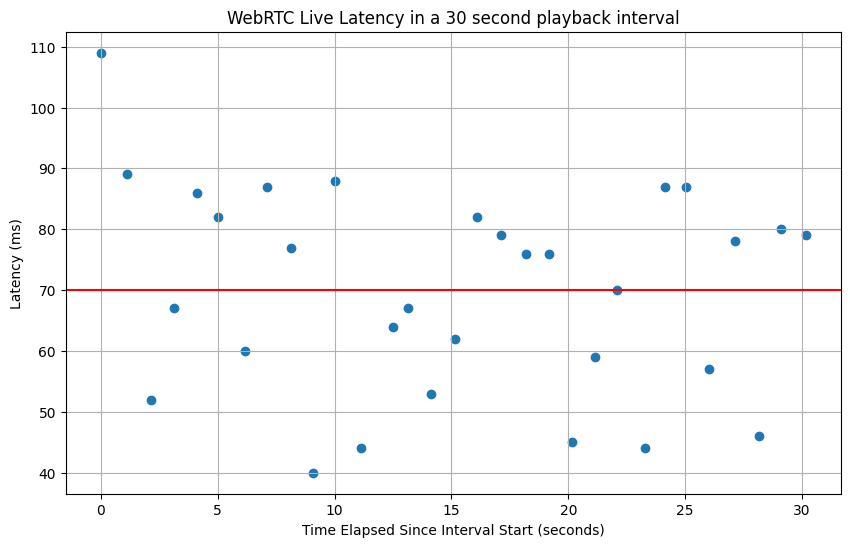

      Frame Count              Start Time                End Time  Latency  \
1342         1342 2024-01-23 15:38:50.007 2024-01-23 15:38:50.116    109.0   
1367         1367 2024-01-23 15:38:51.103 2024-01-23 15:38:51.192     89.0   
1392         1392 2024-01-23 15:38:52.147 2024-01-23 15:38:52.199     52.0   
1416         1416 2024-01-23 15:38:53.141 2024-01-23 15:38:53.208     67.0   
1439         1439 2024-01-23 15:38:54.099 2024-01-23 15:38:54.185     86.0   
1461         1461 2024-01-23 15:38:55.021 2024-01-23 15:38:55.103     82.0   
1489         1489 2024-01-23 15:38:56.178 2024-01-23 15:38:56.238     60.0   
1511         1511 2024-01-23 15:38:57.101 2024-01-23 15:38:57.188     87.0   
1536         1536 2024-01-23 15:38:58.146 2024-01-23 15:38:58.223     77.0   
1559         1559 2024-01-23 15:38:59.097 2024-01-23 15:38:59.137     40.0   
1581         1581 2024-01-23 15:39:00.019 2024-01-23 15:39:00.107     88.0   
1608         1608 2024-01-23 15:39:01.148 2024-01-23 15:39:01.19

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Adjusted Time'], df['Latency'], marker='o')
plt.axhline(y=average_latency, color='r', linestyle='-', label='Average Latency')

plt.xlabel('Time Elapsed Since Interval Start (seconds)')
plt.ylabel('Latency (ms)')
plt.title('WebRTC Live Latency in a 30 second playback interval')
plt.grid(True)
plt.show()

print(df)

In [ ]:
# Calculate median and 0.75 quantile for Latency to provide insights into the distribution of latency values
median_latency = df['Latency'].median()
quantile_75_latency = df['Latency'].quantile(0.75)

print("Median Latency (ms):", median_latency)
print("0.75 Quantile of Latency (ms):", quantile_75_latency)

Median Latency (ms): 76.0
0.75 Quantile of Latency (ms): 82.0


In [ ]:
df['Latency'].describe()

count     31.000000
mean      70.064516
std       16.968472
min       40.000000
25%       58.000000
50%       76.000000
75%       82.000000
max      109.000000
Name: Latency, dtype: float64

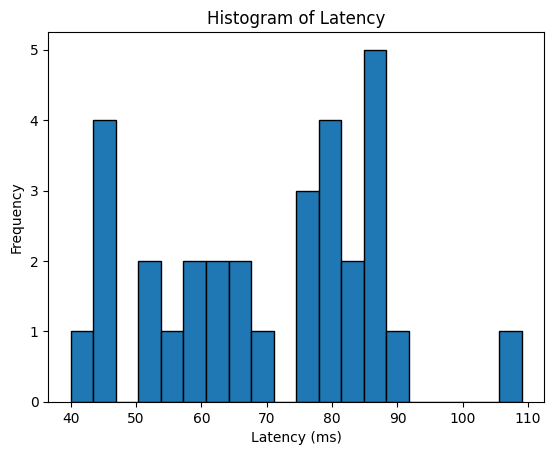

In [ ]:
plt.hist(df['Latency'], bins=20, edgecolor='black')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Latency')
plt.show()

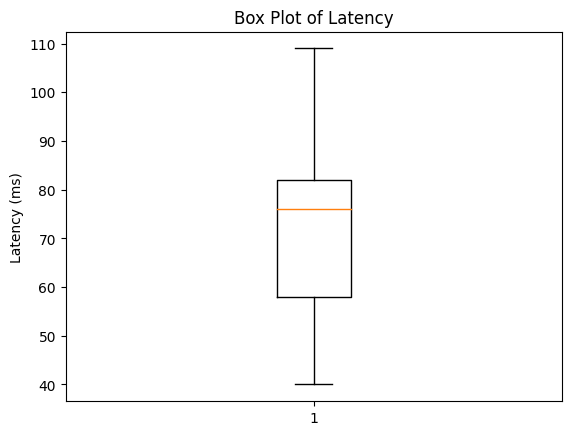

In [ ]:
plt.boxplot(df['Latency'])
plt.ylabel('Latency (ms)')
plt.title('Box Plot of Latency')
plt.show()

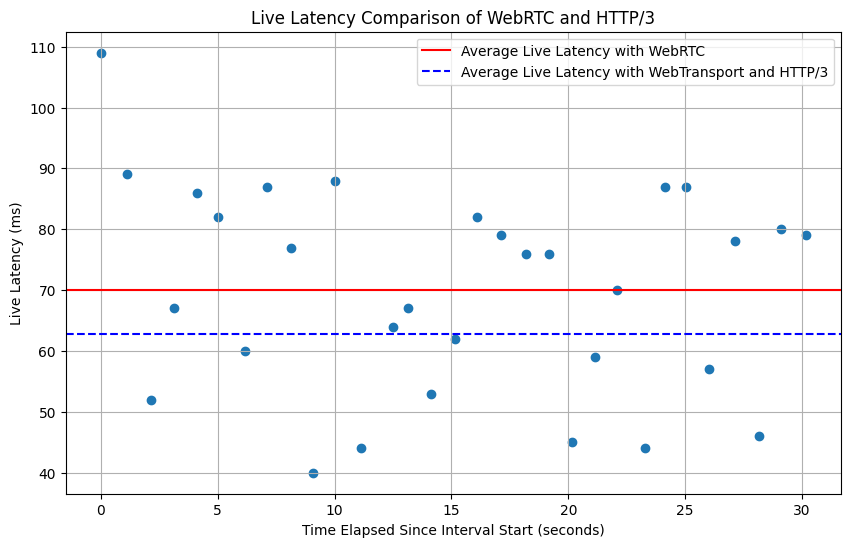

In [ ]:

# Your existing code for plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Adjusted Time'], df['Latency'], marker='o')
plt.axhline(y=average_latency, color='r', linestyle='-', label='Average Live Latency with WebRTC')

# Adding the specified average latency line
specified_average_latency = 62.8
plt.axhline(y=specified_average_latency, color='b', linestyle='--', label='Average Live Latency with WebTransport and HTTP/3')

plt.xlabel('Time Elapsed Since Interval Start (seconds)')
plt.ylabel('Live Latency (ms)')
plt.title('Live Latency Comparison of WebRTC and HTTP/3')
plt.grid(True)
plt.legend()
plt.show()

